# Hinglish Sarcasm Detection System

In [24]:
#!pip install fasttext
#!pip install FastText
#!pip install imblearn

In [1]:
import pandas as pd
import fasttext.util
import fasttext
from timeit import default_timer as timer
from imblearn import over_sampling
from nltk.tokenize import word_tokenize
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE
import numpy as np
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import  sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import itertools

pd.set_option("display.max_columns",100)

run_cv=False 
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)

# Create Embedding
Different embedding are created in different programs

# Read an Emebedding for Modelling

In [2]:
#paths required
datafolder_p = r'D:\18-DS\github\SDSHL\data\processed'
datafolder_e = r'D:\18-DS\github\SDSHL\data\external'
datafolder_i = r'D:\18-DS\github\SDSHL\data\internal'
modelfolder  = r'D:\18-DS\data\models'

embed_name={
1: 'tfidf'             ,
2: 'word2vec'          ,
3: 'bert_indicnlp'     ,
4: 'bert_multiling'    ,
5: 'bow'               ,
6: 'fasttext'          ,
7: 'fasttext_indicnlp' ,
8: 'fastext_wiki'      ,
}

embed_file={
'tfidf'             : r'\embedding_tfidf.csv',
'word2vec'          : r'\embedding_w2v.csv',
'bert_indicnlp'     : r'\embedding_bert768_indicnlp_pretrained.csv',
'bert_multiling'    : r'\embedding_bert768_mbert_pretrained.csv',
'bow'               : r'\embedding_bow.csv',
'fasttext'          : r'\embedding_ft_local.csv',
'fasttext_indicnlp' : r'\embedding_ft300_indicnlp_pretrained.csv',
'fastext_wiki'      : r'\embedding_ft300_wiki_pretrained.csv'
}

prediction={}

### <font color=red> Choose Embedding Number</font>

In [30]:
embed_number=8
embed_name[embed_number]

'fastext_wiki'

In [31]:
file = datafolder_p +  embed_file[ embed_name[embed_number] ]
df = pd.read_csv(file, index_col="ID")
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,label
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.162928,0.095367,-0.270726,-0.03384,0.034278,0.120928,0.087092,-0.115207,0.055495,0.133823,0.062588,0.039311,-0.088273,0.033088,0.028507,-0.074995,0.056435,0.037765,0.022923,0.062004,0.152223,0.078918,0.114340,0.188144,0.161629,-0.006947,0.050337,0.053138,0.235611,0.191250,0.063047,0.173992,-0.038251,0.092351,0.036400,-0.01885,-0.025508,0.139349,-0.086979,-0.071469,-0.144061,-0.023306,-0.027159,-0.007789,-0.033639,-0.083511,0.095624,-0.149528,0.094528,-0.151834,...,-0.253305,-0.025234,0.061098,0.177607,0.125724,-0.206747,-0.057239,0.006420,0.120154,0.201265,-0.109659,0.115837,0.000832,0.091689,0.075129,-0.004104,-0.205243,0.027828,-0.279973,0.020483,-0.042225,0.324231,-0.048028,-0.128153,0.052849,0.142887,-0.006277,-0.032155,-0.031587,0.093297,-0.192797,0.063614,-0.018893,0.078437,-0.016492,0.012553,-0.005834,0.041257,0.016091,-0.164905,-0.055731,0.041201,0.144496,0.057590,-0.009661,-0.040901,-0.110141,-0.15669,0.003502,1
5,-0.030106,0.080064,-0.321531,-0.16435,-0.028727,0.172969,-0.007423,-0.138324,0.027967,0.086445,0.114278,0.098639,-0.068890,-0.056845,0.051973,-0.048098,0.068304,0.064950,-0.031649,0.069061,0.138064,0.118835,0.020957,0.232424,0.180835,-0.096964,-0.057579,-0.176476,0.153703,0.171575,0.040878,0.144826,-0.010258,0.017955,0.008822,-0.08679,0.019059,0.083874,-0.019288,-0.046358,-0.064111,0.003741,-0.034555,-0.143344,-0.000743,-0.084006,0.026098,-0.096636,0.161076,-0.167572,...,-0.169849,-0.004586,-0.091041,0.031144,0.044419,-0.034911,-0.008661,0.031289,0.038242,0.321121,-0.117684,0.096799,-0.002495,0.192767,0.178332,0.115758,-0.110547,-0.016355,-0.198722,-0.031714,-0.006544,0.303485,-0.096664,-0.109661,0.030512,0.107023,-0.016860,0.044601,-0.011993,0.010152,-0.124225,0.032940,-0.024881,-0.034204,0.063488,-0.014290,-0.082256,0.131846,-0.018537,-0.211557,-0.035299,0.067891,0.043531,-0.052649,0.025585,0.046067,-0.105926,-0.24707,-0.024519,1


# Test Train Split

In [32]:
from sklearn.model_selection import train_test_split
y= df.label
X = df.drop(columns=["label"])

# Make training and test sets 
X_train1, X_val1, y_train1, y_val1 = train_test_split(X, y, stratify=y, test_size=0.1, random_state=53)

print( X_train1.shape, X_val1.shape, y_train1.shape, y_val1.shape)

(1800, 300) (200, 300) (1800,) (200,)


In [47]:
# ros = over_sampling.RandomOverSampler(random_state=100)
# X_train_ros, y_train_ros       = ros.fit_resample(X_train1, y_train1)
# X_val_ros,  y_val_ros        = ros.fit_resample(X_val1, y_val1)

# smt = over_sampling.SMOTE(random_state=100)
# X_train_smote, y_train_smote   = smt.fit_resample(X_train1, y_train1)
# X_val_smote,  y_val_smote    = smt.fit_resample(X_val1, y_val1)

# ada = over_sampling.ADASYN(random_state=100)
# X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train1, y_train1)
# X_val_adasyn,  y_val_adasyn  = ada.fit_resample(X_val1, y_val1)

In [33]:
model_with_data_list=['Normal','RandomOverSampler','Smote','AdaSyn']
# option=-1
# while not (option>=0 and option<=3):
#     i = input('0-Normal, 1-RandomOverSampler, 2-Smote, 3-AdaSyn ')
#     try:
#         option=int(i)
#     except:
#         option=-1    

option = 0
if option==0:
    X_train, X_val, y_train, y_val = train_test_split(X, y,stratify=y, test_size=0.1, random_state=100)
elif option==1:
    X_train, X_val, y_train, y_val = X_train_ros, X_val_ros, y_train_ros , y_val_ros
elif option==2:
    X_train, X_val, y_train, y_val = X_train_smote, X_val_smote, y_train_smote , y_val_smote
elif option==3:
    X_train, X_val, y_train, y_val = X_train_adasyn, X_val_adasyn, y_train_adasyn , y_val_adasyn
    
print ( 'Oversampling Technique Used: Option 0: Normal')

Oversampling Technique Used: Option 0: Normal


# Confusion Matrix Plotting

In [7]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [51]:
# def most_informative_feature_for_binary_classification(vectorizer, classifier, n=100):
#     """
#     See: https://stackoverflow.com/a/26980472
    
#     Identify most important features if given a vectorizer and binary classifier. Set n to the number
#     of weighted features you would like to show. (Note: current implementation merely prints and does not 
#     return top classes.)
#     """

#     class_labels = classifier.classes_
#     feature_names = vectorizer.get_feature_names()
#     topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
#     topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

#     for coef, feat in topn_class1:
#         print(class_labels[0], coef, feat)

#     print()

#     for coef, feat in reversed(topn_class2):
#         print(class_labels[1], coef, feat)

# Common Function for Classification Model

In [8]:
# Plotting cv results
def draw_cv_results(cv_df, param_name, metric_name, title_name, log_true):
    plt.figure(figsize=(10,4))
    
    if log_true:
        x_axis= np.log10( list(cv_df[param_name]))
        x_axis_title = "Log Value "+param_name
    else:
        x_axis = list(cv_df[param_name])
        x_axis_title = param_name
        
    plt.plot( x_axis, cv_df['mean_train_score'] )
    plt.plot( x_axis, cv_df['mean_test_score'] )
    plt.xlabel(x_axis_title)
    plt.ylabel(metric_name)
    plt.title(title_name)
    plt.legend(['Train ' + metric_name +' score', 'Test ' +metric_name+' score'], loc='upper left')


In [9]:
# Function to plot the confusion Matrix
def draw_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.tab10):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
   
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)

    fmt = 'd' 
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.fill(j,i,facecolor="red" if cm[i, j] < thresh else "blue", edgecolor='b', linewidth=2)
        #plt.Rectangle((0, 0), 1, 0, linewidth=1, edgecolor='b', facecolor='none')
        
        plt.text(j, i, format(cm[i, j], fmt), fontsize=20, weight="bold", 
                 verticalalignment='center',
                 horizontalalignment="center",
                 color="white", 
                 
                bbox=dict(facecolor='red', alpha=0.8))

    plt.tight_layout()
    plt.ylabel('True label',fontsize=18)
    plt.xlabel('Predicted label', fontsize=18)

In [63]:
file

'D:\\18-DS\\github\\SDSHL\\data\\processed\\embedding_tfidf.csv'

In [41]:
class_names=[0,1]

def draw_roc( actual, probs, prob_values=True, Threshold_limit=0.4 ):
  
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                          drop_intermediate = False )
    
    threshold = thresholds[np.argmax(tpr-fpr)]

    if prob_values:
        pred= probs.map(lambda x: 1 if x > threshold else 0)
    else:
        pred= probs
    
    prediction[ embed_name[embed_number] ] = probs
    
    auc_score = round( metrics.roc_auc_score( actual, probs) ,2)
    
    recall    = round( metrics.recall_score(actual,pred),2)
    precision = round(metrics.precision_score(actual, pred),2)
    accuracy  = round(metrics.accuracy_score(actual,pred),2)
    f1= round(metrics.f1_score(actual,pred),2)
    

    plt.figure(figsize=(20, 5))
    plt.subplot(1,2,1)
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]',fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic example',fontsize=20)
    plt.legend(loc="lower right")
    
    plt.subplot(1,2,2)
    cm = confusion_matrix(actual, pred)
    draw_confusion_matrix(cm,class_names)
    plt.show()
    
    print ("This Model Result is for ", model_with_data_list[option], " Data")
    print ("ROC AUC Score on Test:",auc_score," Threshold:{:.5f}".format(threshold))
    print ("Accuracy",accuracy,"AUC:",auc_score,"Recall:",recall,"Precision:",precision,"F1:",f1)
    return accuracy,auc_score,recall,precision,f1

# Create Classification Model

In [17]:
print( X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(1800, 100) (200, 100) (1800,) (200,)


## LogisticRegression Model

In [54]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

In [55]:
# Cross validation using different values of C. Let's check which value of C gives best result
start=timer()
if run_cv:
    hyper_params = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }]

    lr = LogisticRegression(max_iter=1000, random_state=100)
    #lr.fit(X_train, y_val)      

    model_cv_logistic = GridSearchCV(estimator=lr, param_grid=hyper_params, \
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_logistic.fit(X_train,  y_train)

    cv_results_lr = pd.DataFrame(model_cv_logistic.cv_results_)
    print(cv_results_lr)
    
end = timer()
print("Duration ",end - start)

Duration  0.00013339999986783369


In [57]:
if run_cv:
    draw_cv_results(cv_results_lr, 'param_C', 'ROC AUC', 'Optimal C', True)
    
if run_cv:
    model_cv_logistic.best_estimator_

In [58]:
#There are 29 variables in X_train. Let's see can we manage good result with lessor variables.
if option==0 or option==1:
    lr = LogisticRegression(C=.1,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for normal
elif option==2:
    lr = LogisticRegression(C=10,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for smote
else:
    lr = LogisticRegression(C=100,max_iter=1000, random_state=100) #Value of C & max_iter from earlier steps #for adasyn
rfe = RFE(lr,15) #Identify top 15 important variables
rfe.fit(X_train,y_train)
useful_cols = X_train.columns[rfe.support_]
print ("Useful Columns: " ,useful_cols)

Useful Columns:  Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14'],
      dtype='object')


D:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


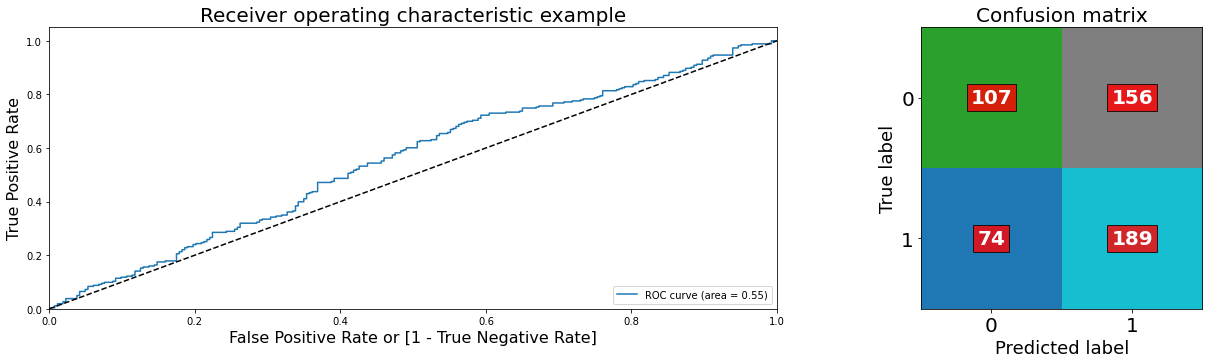

This Model Result is for  Smote  Data
ROC AUC Score on Test: 0.55  Threshold:0.48244
Accuracy 0.56 AUC: 0.55 Recall: 0.72 Precision: 0.55 F1: 0.62


In [61]:
#Hyperparameter Turning of LogisticRegression
#Train the model with only 15 variables (identified in earlier step)

X_train_= X_train[useful_cols]
X_val_ = X_val[useful_cols]
lr = LogisticRegression(C=.1,max_iter=1000, random_state=100)
lr.fit(X_train_,y_train)

y_val_pred_logistic = lr.predict_proba(X_val_)
y_val_pred_logistic = pd.DataFrame({'Class':y_val.values, 'Class_Prob':y_val_pred_logistic[:,1:2].reshape(-1) })

#check ROC_AUC Score on Test
logistic_acc, logistic_auc_val, logistic_recall_val, logistic_precision_val, logistic_f1_val = \
                        draw_roc(y_val_pred_logistic.Class, y_val_pred_logistic.Class_Prob, True)


## Light GradientBoost Classifier

In [34]:
import lightgbm as lgbm
# Cross validation using different values of n_estimators.
start=timer()
run_cv=True
if run_cv:
    hyper_params=[{  'n_estimators': range(10,110,10)  }]

    lgbm_clf = lgbm.LGBMClassifier(random_state=100)
    model_cv_lgbm = GridSearchCV(estimator=lgbm_clf, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_lgbm.fit(X_train,  y_train)

    cv_results_lbgm = pd.DataFrame(model_cv_lgbm.cv_results_)
    cv_results_lbgm.sort_values('rank_test_score')

end = timer()
print("Duration ",end - start)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.0min finished


Duration  185.38449879999985


In [33]:
# Cross validation using different values of n_estimators.
start=timer()
run_cv=True
if run_cv:
    hyper_params=[{  'n_estimators': range(10,110,10)  }]

    lgbm_clf = lgbm.LGBMClassifier(random_state=100)
    model_cv_lgbm = GridSearchCV(estimator=lgbm_clf, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_lgbm.fit(X_train,  y_train)

    cv_results_lbgm = pd.DataFrame(model_cv_lgbm.cv_results_)
    cv_results_lbgm.sort_values('rank_test_score')

end = timer()
print("Duration ",end - start)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   19.2s finished


Duration  19.57504659999995


In [35]:

cv_results_lbgm

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.451269,0.045482,0.011553,0.003777,10,{'n_estimators': 10},0.931111,0.935062,0.907778,0.904321,0.911728,0.934321,0.944074,0.868395,0.910617,0.916914,0.916432,0.020572,10,0.996514,0.995816,0.995993,0.997171,0.996257,0.996869,0.995949,0.997449,0.996949,0.996999,0.996597,0.000541
1,0.763583,0.051715,0.017032,0.003188,20,{'n_estimators': 20},0.950864,0.949136,0.931605,0.925926,0.940247,0.948025,0.955679,0.900123,0.923086,0.941111,0.936580,0.015940,9,0.999841,0.999694,0.999593,0.999852,0.999508,0.999707,0.999534,0.999852,0.999838,0.999781,0.999720,0.000128
2,1.054649,0.047679,0.015630,0.002820,30,{'n_estimators': 30},0.959753,0.952840,0.944074,0.933086,0.947037,0.958765,0.957037,0.911358,0.924198,0.952346,0.944049,0.015394,8,0.999998,0.999988,0.999991,1.000000,1.000000,0.999991,0.999986,1.000000,1.000000,0.999994,0.999995,0.000005
3,1.288503,0.041715,0.014869,0.003034,40,{'n_estimators': 40},0.962593,0.955802,0.949630,0.933827,0.946420,0.967778,0.961852,0.925926,0.930247,0.957407,0.949148,0.013931,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,1.569184,0.023006,0.019360,0.001562,50,{'n_estimators': 50},0.964938,0.956667,0.952469,0.933827,0.948148,0.969259,0.961975,0.932099,0.930988,0.955556,0.950593,0.013275,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,1.877342,0.042037,0.017151,0.002495,60,{'n_estimators': 60},0.967778,0.958889,0.954444,0.937531,0.949136,0.969012,0.966173,0.935062,0.934815,0.960864,0.953370,0.012854,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,2.150709,0.020840,0.018760,0.001963,70,{'n_estimators': 70},0.969506,0.958395,0.954691,0.938765,0.951111,0.969259,0.966049,0.938642,0.934198,0.960864,0.954148,0.012464,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,2.444731,0.033913,0.017267,0.002614,80,{'n_estimators': 80},0.970494,0.960617,0.955556,0.940370,0.951358,0.970247,0.968519,0.940000,0.935679,0.960000,0.955284,0.012397,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,2.760147,0.127411,0.016019,0.003641,90,{'n_estimators': 90},0.970123,0.961111,0.957407,0.941975,0.953827,0.968642,0.969877,0.940988,0.938148,0.961481,0.956358,0.011637,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,3.265993,0.216821,0.017428,0.003654,100,{'n_estimators': 100},0.969259,0.961358,0.957654,0.940123,0.955185,0.968395,0.970000,0.944198,0.936420,0.960864,0.956346,0.011639,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


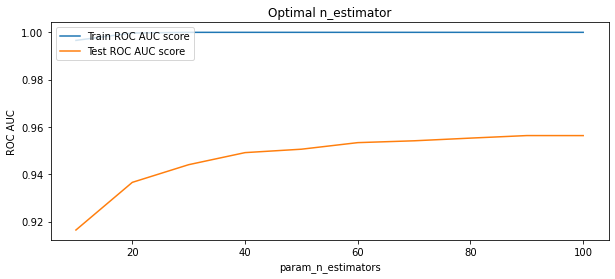

In [37]:
if run_cv:
    draw_cv_results(cv_results_lbgm, 'param_n_estimators', 'ROC AUC', 'Optimal n_estimator', False)

In [38]:
if run_cv:
    print(model_cv_lgbm.best_estimator_)

LGBMClassifier(n_estimators=90, random_state=100)


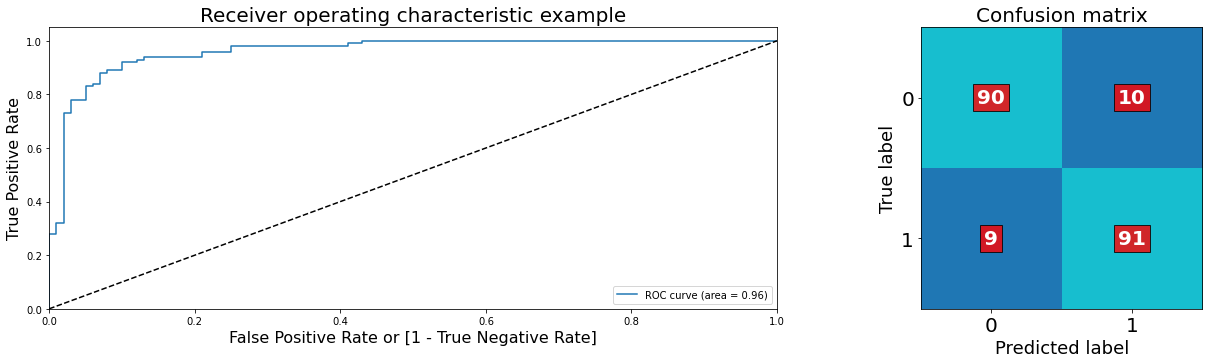

This Model Result is for  Normal  Data
ROC AUC Score on Test: 0.96  Threshold:0.53243
Accuracy 0.9 AUC: 0.96 Recall: 0.91 Precision: 0.9 F1: 0.91


In [42]:
import lightgbm as lgbm
# Optimized Hyper Paramters.


#Hyperparamter Tuning
#lgbmc = lgbm.LGBMClassifier(n_estimators=100, random_state = 42)
# lgbmc = lgbm.LGBMClassifier(colsample_bytree=1.0,
#                importance_type='split', learning_rate=0.1, max_depth=-1,
#                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
#                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
#                random_state=100, reg_alpha=0.0, reg_lambda=0.0, silent=True,
#                subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

lgbmc = lgbm.LGBMClassifier(n_estimators=90, random_state=100)

lgbmc.fit(X_train, y_train) 

y_val_pred_lgbmc = lgbmc.predict_proba(X_val)[:,1:2].reshape(-1)
y_val_pred_lgbmc = pd.DataFrame({'Class':y_val.values, 'Class_Prob':y_val_pred_lgbmc  }) #.reshape(-1)

lgbmc_accuracy_val, lgbmc_auc_val, lgbmc_recall_val, lgbmc_precision_val, lgbmc_f1_val = \
                        draw_roc(y_val_pred_lgbmc.Class, y_val_pred_lgbmc.Class_Prob,True)

## GradientBoosting Model

In [16]:
from sklearn.ensemble import  GradientBoostingClassifier


In [37]:
# Cross validation using different values of n_estimators.
start=timer()
if run_cv:
    hyper_params=[{  'n_estimators': range(10,110,10)  }]

    gbc = GradientBoostingClassifier(random_state=100)
    model_cv_gbc = GridSearchCV(estimator=gbc, param_grid=hyper_params,
                            cv=folds, scoring="roc_auc", return_train_score=True, verbose=True)
    model_cv_gbc.fit(X_train,  y_train)

    cv_results_gbc = pd.DataFrame(model_cv_gbc.cv_results_)
    cv_results_gbc.sort_values('rank_test_score')

end = timer()
print("Duration ",end - start)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


Duration  65.34965290000014


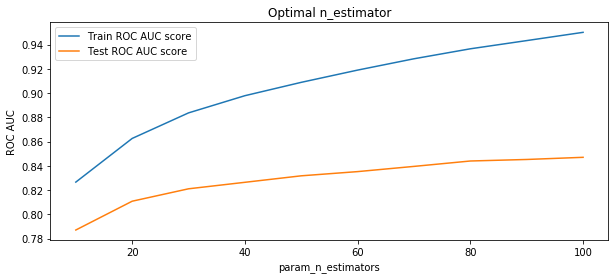

In [38]:
if run_cv:
    draw_cv_results(cv_results_gbc, 'param_n_estimators', 'ROC AUC', 'Optimal n_estimator', False)

In [41]:
cv_results_gbc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.125106,0.018288,0.002903,0.000830,10,{'n_estimators': 10},0.811791,0.787100,0.806878,0.789557,...,0.813495,0.830083,0.833622,0.836023,0.829095,0.828394,0.828489,0.825770,0.826662,0.006366
1,0.231294,0.019674,0.002801,0.000601,20,{'n_estimators': 20},0.845553,0.814909,0.849175,0.806815,...,0.859142,0.856476,0.867332,0.867354,0.869047,0.864064,0.869278,0.859987,0.862700,0.005036
2,0.375200,0.045103,0.003806,0.001167,30,{'n_estimators': 30},0.855348,0.821838,0.863127,0.821869,...,0.881744,0.881425,0.890466,0.889411,0.887072,0.883248,0.885900,0.880045,0.883782,0.003966
3,0.454598,0.034829,0.002601,0.000490,40,{'n_estimators': 40},0.864072,0.826940,0.870559,0.828546,...,0.898211,0.897425,0.902999,0.902174,0.898001,0.897829,0.900156,0.892896,0.897967,0.003027
4,0.596707,0.065531,0.002902,0.000702,50,{'n_estimators': 50},0.870244,0.834908,0.872134,0.836357,...,0.908502,0.909089,0.913475,0.913470,0.908857,0.907307,0.911375,0.904964,0.908986,0.002849
5,0.672288,0.039293,0.002800,0.000600,60,{'n_estimators': 60},0.870118,0.836231,0.871945,0.842404,...,0.918831,0.917218,0.923999,0.925523,0.919466,0.916708,0.919681,0.915827,0.919086,0.003238
6,0.776505,0.034509,0.002998,0.000447,70,{'n_estimators': 70},0.874150,0.844104,0.874339,0.849521,...,0.928853,0.925317,0.932375,0.933919,0.929102,0.925972,0.929414,0.927108,0.928429,0.002888
7,0.860997,0.022642,0.002904,0.001132,80,{'n_estimators': 80},0.875661,0.852923,0.878748,0.857395,...,0.937708,0.934044,0.940458,0.940991,0.938242,0.934056,0.938346,0.933738,0.936657,0.002859
8,1.097899,0.136425,0.003197,0.000869,90,{'n_estimators': 90},0.873457,0.858340,0.878118,0.859977,...,0.944808,0.940819,0.945476,0.947700,0.944928,0.942017,0.944323,0.941271,0.943432,0.002396
9,1.123008,0.075153,0.003596,0.001356,100,{'n_estimators': 100},0.872764,0.861552,0.880952,0.861111,...,0.951051,0.947627,0.951849,0.954281,0.951173,0.949812,0.952011,0.948313,0.950237,0.002355


In [39]:
if run_cv:
    print(model_cv_gbc.best_estimator_)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


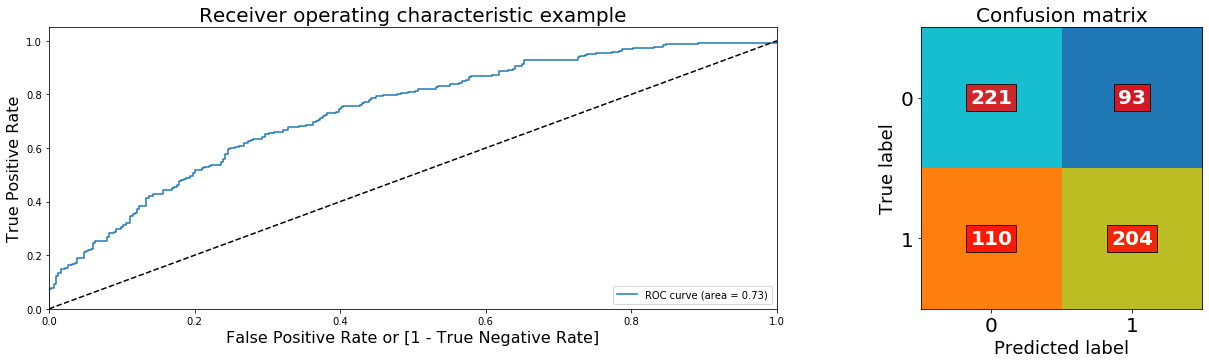

This Model Result is for  Smote  Data
ROC AUC Score on Test: 0.73  Threshold:0.51579
Accuracy 0.68 AUC: 0.73 Recall: 0.65 Precision: 0.69 F1: 0.67


In [56]:
from sklearn.ensemble import  GradientBoostingClassifier
gbc = GradientBoostingClassifier() 


#Hyperparamter Tuning
#gbc = GradientBoostingClassifier( random_state=100)
gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

gbc.fit(X_train, y_train) 

y_val_pred_gbc = gbc.predict_proba(X_val)[:,1:2].reshape(-1)
y_val_pred_gbc = pd.DataFrame({'Class':y_val.values, 'Class_Prob':y_val_pred_gbc  }) #.reshape(-1)

gbc_accuracy_val, gbc_auc_val, gbc_recall_val, gbc_precision_val, gbc_f1_val = \
                        draw_roc(y_val_pred_gbc.Class, y_val_pred_gbc.Class_Prob,True)

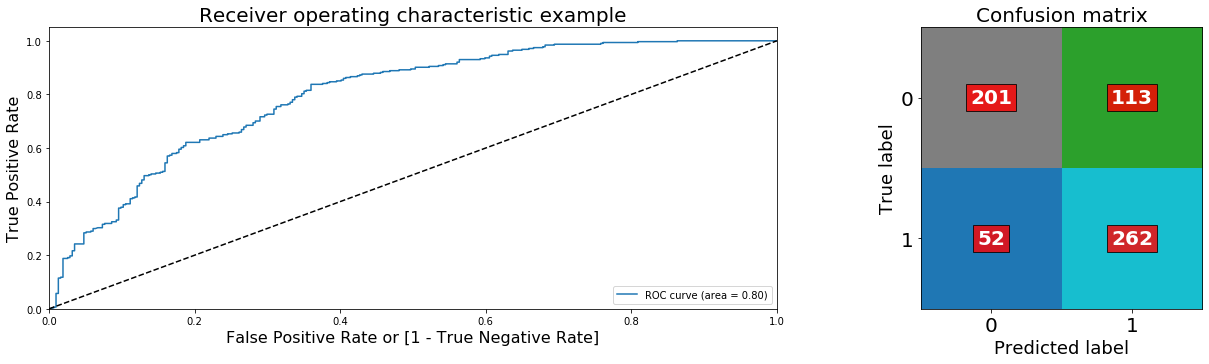

This Model Result is for  Smote  Data
ROC AUC Score on Test: 0.8  Threshold:0.39991
Accuracy 0.74 AUC: 0.8 Recall: 0.83 Precision: 0.7 F1: 0.76


In [96]:
#with Word2Vec Embedding Features

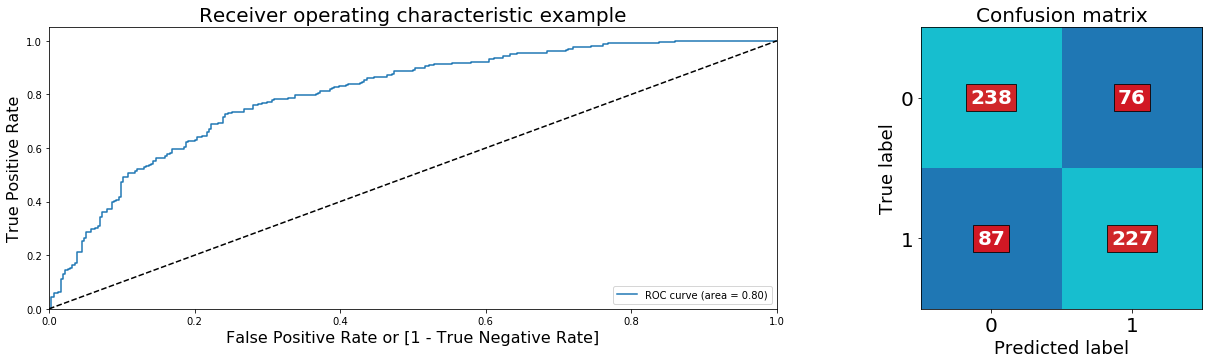

This Model Result is for  Smote  Data
ROC AUC Score on Test: 0.8  Threshold:0.51723
Accuracy 0.74 AUC: 0.8 Recall: 0.72 Precision: 0.75 F1: 0.74


In [87]:
#with FastText Embedding Features

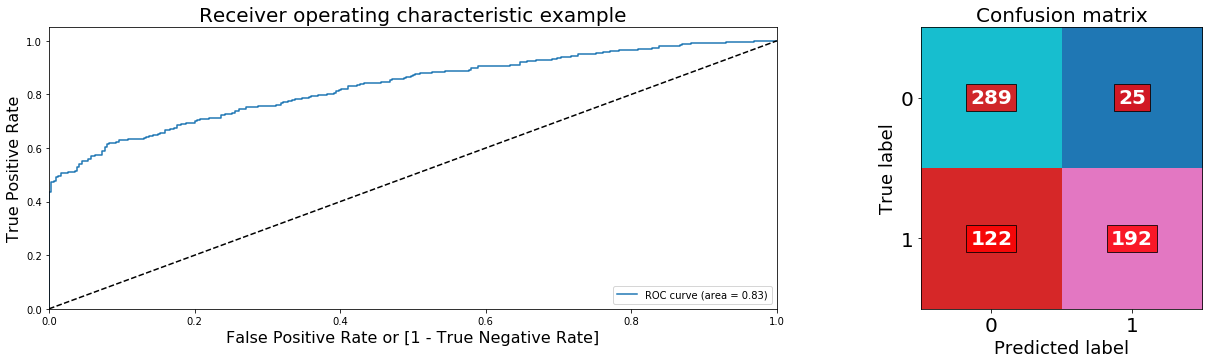

This Model Result is for  Smote  Data
ROC AUC Score on Test: 0.83  Threshold:0.56484
Accuracy 0.77 AUC: 0.83 Recall: 0.61 Precision: 0.88 F1: 0.72


In [91]:
#With Bert Embedding Features

## RandomForest Model

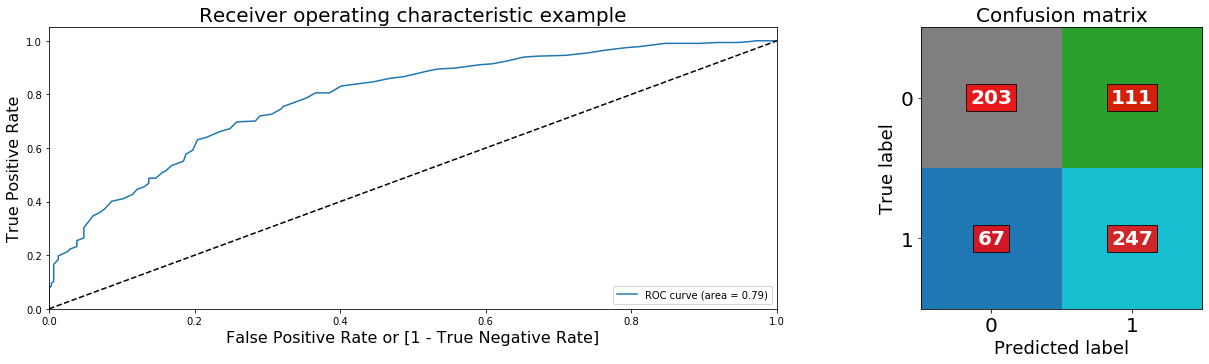

This Model Result is for  Smote  Data
ROC AUC Score on Test: 0.79  Threshold:0.37000
Accuracy 0.72 AUC: 0.79 Recall: 0.79 Precision: 0.69 F1: 0.74


In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier() 

#Hyperparamter Tuning
rfc = RandomForestClassifier( random_state=100)
rfc.fit(X_train, y_train) 

y_val_pred_rfc = rfc.predict_proba(X_val)[:,1:2].reshape(-1)
y_val_pred_rfc = pd.DataFrame({'Class':y_val.values, 'Class_Prob':y_val_pred_rfc  }) #.reshape(-1)

rfc_accuracy_val, rfc_auc_val, rfc_recall_val, rfc_precision_val, rfc_f1_val = \
                        draw_roc(y_val_pred_rfc.Class, y_val_pred_rfc.Class_Prob,True)

## AdaBoost Model

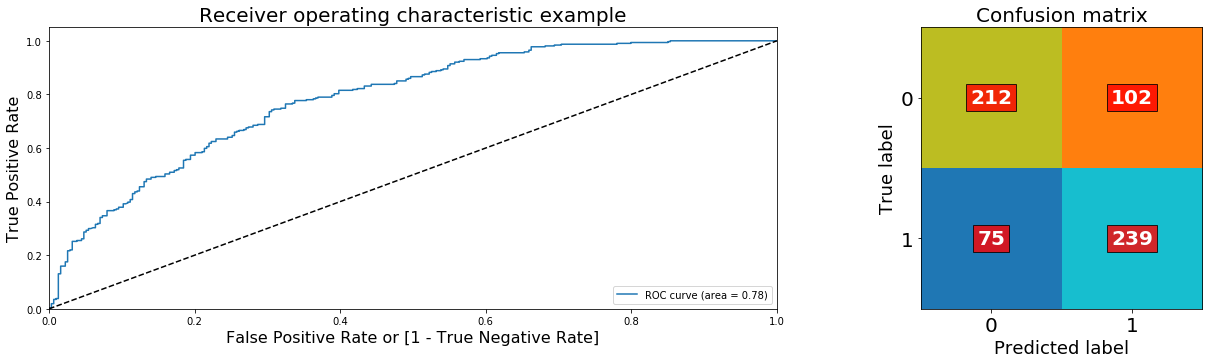

This Model Result is for  Smote  Data
ROC AUC Score on Test: 0.78  Threshold:0.49942
Accuracy 0.72 AUC: 0.78 Recall: 0.76 Precision: 0.7 F1: 0.73


In [23]:
from sklearn.ensemble import AdaBoostClassifier

#Hyperparamter Tuning
adbc = AdaBoostClassifier( random_state=100)
adbc.fit(X_train, y_train) 

y_val_pred_adbc = adbc.predict_proba(X_val)[:,1:2].reshape(-1)
y_val_pred_adbc = pd.DataFrame({'Class':y_val.values, 'Class_Prob':y_val_pred_adbc  }) #.reshape(-1)

adbc_accuracy_val, adbc_auc_val, adbc_recall_val, adbc_precision_val, adbc_f1_val = \
                        draw_roc(y_val_pred_adbc.Class, y_val_pred_adbc.Class_Prob,True)

## SVC Model

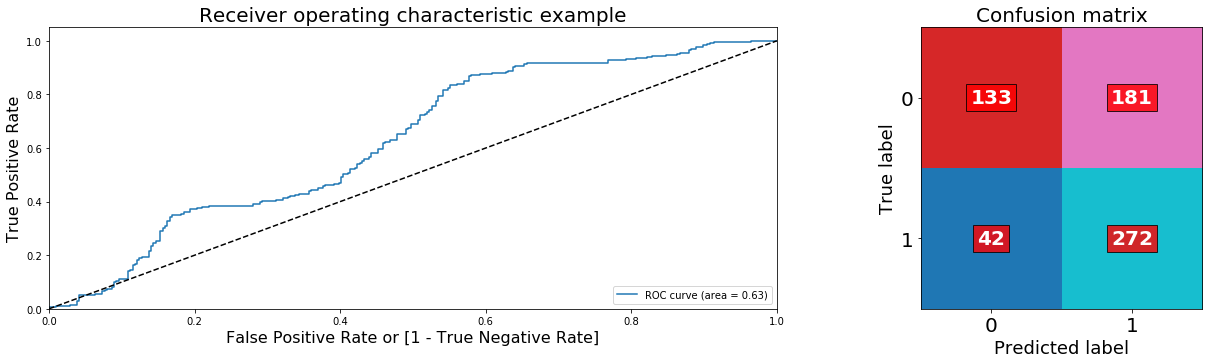

This Model Result is for  Smote  Data
ROC AUC Score on Test: 0.63  Threshold:0.52772
Accuracy 0.64 AUC: 0.63 Recall: 0.87 Precision: 0.6 F1: 0.71


In [22]:
from sklearn.svm import SVC
svc = SVC()

#Hyperparamter Tuning
svc = SVC( random_state=100, probability=True)
svc.fit(X_train, y_train) 

y_val_pred_svc = svc.predict_proba(X_val)[:,1:2].reshape(-1)
y_val_pred_svc = pd.DataFrame({'Class':y_val.values, 'Class_Prob':y_val_pred_svc  }) #.reshape(-1)

svc_accuracy_val, svc_auc_val, svc_recall_val, svc_precision_val, svc_f1_val = \
                        draw_roc(y_val_pred_svc.Class, y_val_pred_svc.Class_Prob,True)

In [ ]:
from xgboost import XGBClassifier
def process_model_XGB(pred_colname):
    xgb = XGBClassifier(n_estimators=5000,
                    tree_method='hist',
                    subsample=1,
                    colsample_level=0.06,
                    verbose=0,
                    n_jobs=6,
                    random_state=100)

    xgb.fit(X_train, y_train) 

    y_val_pred_xgb = xgb.predict_proba(X_val)[:,1:2].reshape(-1)

    y_val_pred_xgb = pd.DataFrame({'Class':y_val.values, 'Class_Prob':y_val_pred_xgb  }) #.reshape(-1)

    xgb_accuracy_val, xgb_auc_val, xgb_recall_val, xgb_precision_val, xgb_f1_val = \
                            draw_roc(y_val_pred_xgb.Class, y_val_pred_xgb.Class_Prob,True,.6,pred_colname)

In [ ]:
# Cross validation using different values of n_estimators.
start=timer()
run_cv=True
if run_cv:
    hyper_params=[{  'n_estimators': [10, 100,200, 500, 1000], 'subsample':[1,2,3] }]

    xgb = XGBClassifier(tree_method='hist',colsample_level=0.06, verbose=0,
                    n_jobs=6, random_state=100)
    
    model_cv_xgb = GridSearchCV(estimator=xgb, param_grid=hyper_params,
                            cv=folds, scoring="accuracy", return_train_score=True, verbose=True)
    model_cv_xgb.fit(X_train,  y_train)

    cv_results_xgb = pd.DataFrame(model_cv_xgb.cv_results_)
    cv_results_xgb.sort_values('rank_test_score')

end = timer()
print("Duration ",end - start)

In [ ]:
cv_results_xgb = pd.DataFrame(model_cv_xgb.cv_results_)
cv_results_xgb.sort_values('rank_test_score')

## BertForSequenceClassification

In [ ]:
df['label'].value_counts()

In [ ]:
5)

In [ ]:
df

# FastText Model Testing

In [8]:
import fasttext
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
df = pd.read_csv("Hinglish_SarcasmCSV.csv")
X_train1, X_test1 = train_test_split(df,stratify=y, test_size=0.2, random_state=53)
X_train1['label'].value_counts(), X_test1['label'].value_counts()

In [23]:
X_train1.to_csv("Hinglish_SarcasmCSV-Train.csv")
X_test1.to_csv("Hinglish_SarcasmCSV-Test.csv")


In [54]:
train_file =r'D:\18-DS\github\Project_NLP\0SDSHL\Hinglish_SarcasmCSV-train.txt'
val_file  =r'D:\18-DS\github\Project_NLP\0SDSHL\Hinglish_SarcasmCSV-test.txt'
#model = fasttext.train_supervised(input=train_file, epoch=25)

#model = fasttext.train_supervised(input=train_file, epoch=25, lr=1.0, 
#                                  wordNgrams=2, bucket=200000, dim=50, loss='hs')

model = fasttext.train_supervised(input=train_file, lr=0.3, epoch=100, 
                                   wordNgrams=4, bucket=200000, dim=50, loss='ova')
    

(('__label__0',), array([0.96290135]))

In [55]:
model.test(val_file)

(463, 0.7170626349892009, 0.7170626349892009)

In [56]:
help(model.test)

Help on method test in module fasttext.FastText:

test(path, k=1, threshold=0.0) method of fasttext.FastText._FastText instance
    Evaluate supervised model using file given by path

